<a href="https://colab.research.google.com/github/CPTR295/ML1/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris=load_iris()
X=iris.data[:,2:]
y=iris.target

In [2]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X,y)

DecisionTreeClassifier()

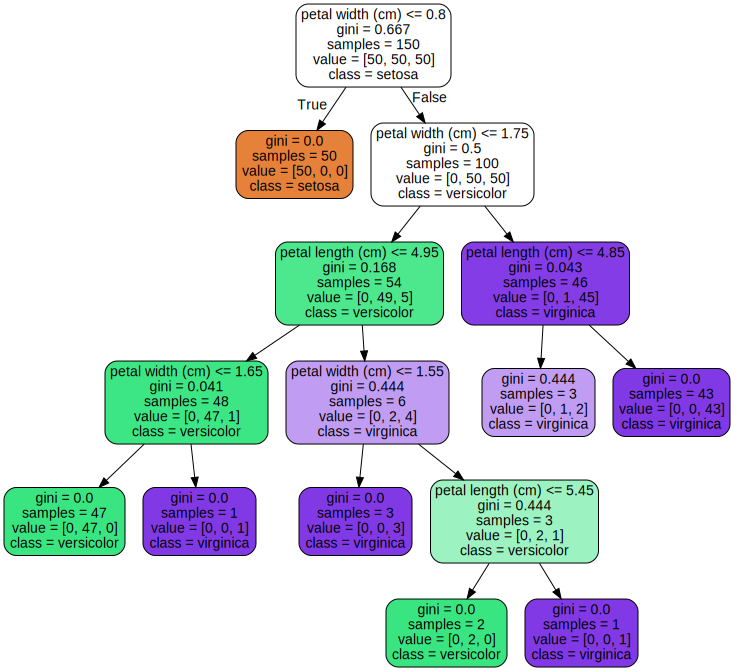

In [6]:
from graphviz import Source
from sklearn.tree import export_graphviz
import os
IMAGES_PATH="/"
export_graphviz(
        tree_clf,
        out_file=os.path.join(IMAGES_PATH, "iris_tree.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
#Sample - How many instances it apply to, root is total , from there it gets divided
#value - How many instances of each class the training applies to
#gini = impurity
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree.dot"))

In [12]:
tree_clf.predict_proba([[2,1.5]])

array([[0., 1., 0.]])

In [15]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X)
accuracy_score(y,y_pred)

0.9933333333333333

In [18]:
tree_clf2 = DecisionTreeClassifier(max_depth=2,random_state=23) #Other hyperparameters - min_sample_split,min_sample_leaf,min_weight_fraction_leaf,max_leaf_nodes
tree_clf2.fit(X,y)


DecisionTreeClassifier(max_depth=2, random_state=23)

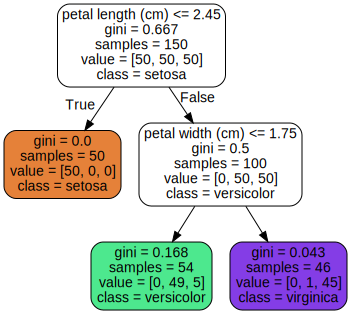

In [19]:
export_graphviz(
        tree_clf2,
        out_file=os.path.join(IMAGES_PATH, "iris_tree2.dot"),
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "iris_tree2.dot"))

In [20]:
y_pred = tree_clf2.predict(X)
accuracy_score(y,y_pred)

0.96

In [22]:
# Quadratic training set + noise
import numpy as np

np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [23]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

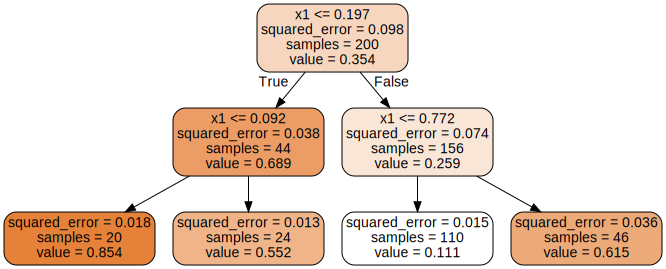

In [26]:
export_graphviz(
        tree_reg,
        out_file=os.path.join(IMAGES_PATH, "regression_tree.dot"),
        feature_names=["x1"],
        rounded=True,
        filled=True
    )
Source.from_file(os.path.join(IMAGES_PATH, "regression_tree.dot"))

In [27]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples=10000,noise=1.4,random_state=42)

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.model_selection import GridSearchCV
params={'max_leaf_nodes':list(range(2,100)),'min_samples_split':[2,3,4]} #98*3 - Candidates
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42),params,cv=3,verbose=1) # 3 Folds
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [31]:
grid_search.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=14, random_state=42)

In [32]:
grid_search.best_score_

np.float64(0.6541252392213165)

In [33]:
y_pred=grid_search.predict(X_test)
accuracy_score(y_test,y_pred)

0.6415